In [13]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

In [14]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [15]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [16]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

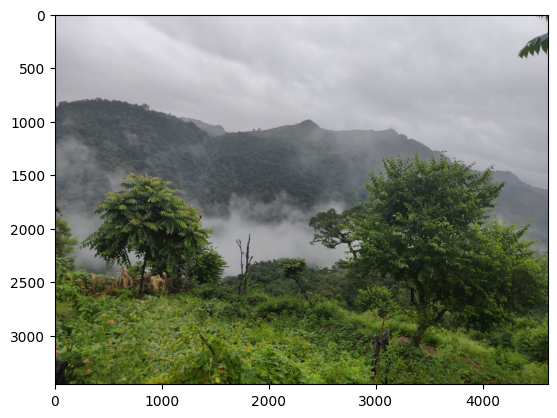

In [17]:
image = get_image('sample_image.jpg')
plt.imshow(image)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array([82.20164354, 89.18615778, 90.39835646]),
 array([198.53842044, 198.49153448, 205.74944064]),
 array([54.52860554, 67.37613111, 33.89371297]),
 array([78.62554832, 96.38021791, 38.43703127]),
 array([146.23122765, 148.37902265, 149.67175209]),
 array([214.36695408, 213.81281331, 221.52090435]),
 array([113.29039667, 118.54198765, 118.05359108]),
 array([30.16074022, 38.5799233 , 21.14100607]),
 array([110.02139871, 125.60028698,  56.42803668]),
 array([179.625983  , 180.21994569, 186.92633212])]

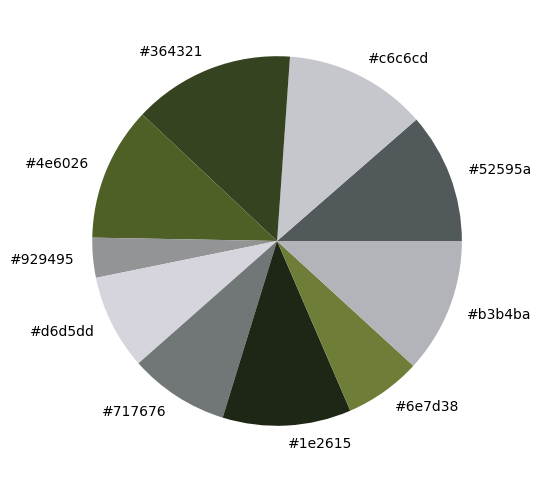

In [18]:
get_colors(image, 10, True)